#Building Basic predictive models over the NYC Taxi Trip dataset.


Models to build :

*   Benchmark Model
*   Knn Model
*   Linear Model
*   Decision Tree Model







MEAN SQUARED ERROR: 

- We are using the MEAN SQUARED ERROR in this project as we are dealing with a regression based problem.

- We prefer MSE over Mean Alsolute Error as it provides a gross idea of the magnitude of error. 

#### Importing Libraries

In [ ]:
#importing libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [ ]:

dat = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')
dat.shape


(729322, 11)

## Cleaning the Dataset
To use the data we need to clean it first

In [ ]:
dat.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
dat.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Typecasting the Variables

In [ ]:
dat['vendor_id'] = dat['vendor_id'].astype('category')

- converting vendor_id to a category as it is a categorical variable

In [ ]:
dat['pickup_datetime'] = pd.to_datetime(dat.pickup_datetime)
dat['dropoff_datetime'] = pd.to_datetime(dat.dropoff_datetime)

typecasting pickup_datetime and dropoff_datetime to datatime datatype to be able to extract thee following details

*   pickup hour
*   pickup day
*   pickup month
*   dropoff hour
*   dropoff day
*   dropoff month



In [ ]:
#using the function dt from datatime library
dat['pickuphour']=dat.pickup_datetime.dt.hour
dat['pickupday']=dat.pickup_datetime.dt.dayofweek
dat['pickupmonth']=dat.pickup_datetime.dt.month
dat['dropoffhour']=dat.dropoff_datetime.dt.hour
dat['dropoffday']=dat.dropoff_datetime.dt.dayofweek
dat['dropoffmonth']=dat.dropoff_datetime.dt.month

In [ ]:
#encoding store_and_fwd_flag
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dat['store_and_fwd_encoded'] = label_encoder.fit_transform(dat['store_and_fwd_flag'])

- encoding the store_and_fwd_flag variable for easy analyzing

### Missing Values

In [ ]:
#checking for missing values
dat.isnull().sum()

id                       0
vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
store_and_fwd_flag       0
trip_duration            0
pickuphour               0
pickupday                0
pickupmonth              0
dropoffhour              0
dropoffday               0
dropoffmonth             0
store_and_fwd_encoded    0
dtype: int64

There are no missing values in our dataset so we can move forward

In [ ]:
#Removing Columns with less Significance
data=dat.drop(['pickup_datetime','dropoff_datetime','id','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag'], axis=1)

In [ ]:
data.head()

,vendor_id,passenger_count,trip_duration,pickuphour,pickupday,pickupmonth,dropoffhour,dropoffday,dropoffmonth,store_and_fwd_encoded
0,2,1,400,16,0,2,16,0,2,0
1,1,2,1100,23,4,3,23,4,3,0
2,2,2,1635,17,6,2,18,6,2,0
3,2,6,1141,9,1,1,10,1,1,0
4,1,1,848,6,2,2,6,2,2,0


#Benchmark Model

Shuffling and Creating Train and Test Set

In [ ]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 52)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [ ]:
train.head()

,vendor_id,passenger_count,trip_duration,pickuphour,pickupday,pickupmonth,dropoffhour,dropoffday,dropoffmonth,store_and_fwd_encoded
184765,2,1,819,23,2,3,23,2,3,0
697925,2,6,1065,17,2,2,17,2,2,0
73547,1,1,211,0,4,1,0,4,1,0
281498,2,6,779,18,1,5,18,1,5,0
374196,1,1,964,1,6,6,1,6,6,0


In [ ]:
test.head()

,vendor_id,passenger_count,trip_duration,pickuphour,pickupday,pickupmonth,dropoffhour,dropoffday,dropoffmonth,store_and_fwd_encoded
546991,1,1,346,7,2,5,8,2,5,0
663400,2,1,1024,21,5,2,21,5,2,0
298272,1,2,192,12,4,5,12,4,5,0
334316,1,1,663,17,5,1,17,5,1,0
610220,2,2,275,4,5,4,4,5,4,0


Simple Mean ( mean of trip_duration)

In [ ]:
test['simple_mean'] = train['trip_duration'].mean()

In [ ]:
#calculating mean squared error
from sklearn.metrics import mean_squared_error as mse

simple_mean_error = mse(test['trip_duration'] , test['simple_mean'])
simple_mean_error

10390927.741288628

The simple mean error is fund so now we can find the mean of trip_duration with respect to other variables and see if we can lower the mse value more

Mean trip_duration with respect to passenger_count

In [ ]:
pc = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
pc

,trip_duration
passenger_count,
0,435.464286
1,918.981595
2,1001.165949
3,1033.103726
4,1006.264779
5,1078.830649
6,1080.191888
7,19.000000
9,560.000000


In [ ]:
# initializing new column to zero
test['passenger_count_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['passenger_count'].unique():
    
  # Assign the mean value corresponding to unique entry
  test['passenger_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [ ]:
#calculating mean squared error
out_type_error = mse(test['trip_duration'] , test['passenger_count'] )
out_type_error

11305724.129396172

Here the value of mse doesnt seem to decrease so lets move onto another variable

Mean trip_duration with respect to vendor_id

In [ ]:
vid = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)

In [ ]:
# initializing new column to zero
test['vendor_id_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['vendor_id'].unique():
    
  # Assign the mean value corresponding to unique entry
  test['vendor_id_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

In [ ]:
#calculating mean squared error
v_id_error = mse(test['trip_duration'] , test['vendor_id'] )
v_id_error

11305987.045748591

Mean trip_duration with respect to pickup_datetime in hours

In [ ]:
phour = pd.pivot_table(train, values='trip_duration', index =data.pickuphour, aggfunc=np.mean)

In [ ]:
# initializing new column to zero
test['pickuphour_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['pickuphour'].unique():
    
  # Assign the mean value corresponding to unique entry
  test['pickuphour_mean'][test['pickuphour'] == str(i)] = train['trip_duration'][train['pickuphour'] == str(i)].mean()

In [ ]:
#calculating mean squared error
phour_error = mse(test['trip_duration'] , test['pickuphour'] )
phour_error

11282982.755029269

Mean trip_duration with respect to dropoff_datetime in hours¶

In [ ]:
dhour = pd.pivot_table(train, values='trip_duration', index =data.dropoffhour, aggfunc=np.mean)

In [ ]:
# initializing new column to zero
test['dropoffhour_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['dropoffhour'].unique():
    
  # Assign the mean value corresponding to unique entry
  test['dropoffhour_mean'][test['dropoffhour'] == str(i)] = train['trip_duration'][train['dropoffhour'] == str(i)].mean()

In [ ]:
#calculating mean squared error
dhour_error = mse(test['trip_duration'] , test['dropoffhour'] )
dhour_error

11283034.901970685

Mean trip_duration with respect to store_and_fwd_flag

In [ ]:
sff = pd.pivot_table(train, values='trip_duration', index =data.store_and_fwd_encoded, aggfunc=np.mean)

In [ ]:
# initializing new column to zero
test['store_and_fwd_flag_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['store_and_fwd_encoded'].unique():
    
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd_flag_mean'][test['store_and_fwd_encoded'] == str(i)] = train['trip_duration'][train['store_and_fwd_encoded'] == str(i)].mean()

In [ ]:
#calculating mean squared error
sff_error = mse(test['trip_duration'] , test['store_and_fwd_encoded'] )
sff_error

11309029.02552896

The mse score seem to increase so lets find the mean value with respect to two variables

Mean trip_duration with respect to both vendor_id and passenger_count

In [ ]:
vpcombo = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','passenger_count'], aggfunc = np.mean)
vpcombo

trip_duration
vendor_id passenger_count               
1         0                   652.125000
          1                   815.482533
          2                   928.395674
          3                   933.271325
          4                   966.717845
          5                   927.401515
          6                  1111.621212
2         0                   146.583333
          1                  1036.671663
          2                  1057.780612
          3                  1094.415458
          4                  1035.624662
          5                  1079.454787
          6                  1080.087671
          7                    19.000000
          9                   560.000000

In [ ]:
# Initiating new empty column
test['vpcombo_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'vendor_id'
s1 = 'passenger_count'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['vpcombo_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [ ]:
vpcombo_mean_error =mse(test['trip_duration'] , test['vpcombo_mean'] )
vpcombo_mean_error

11309041.1104309

Mean trip_duration with respect to both pickupday and pickuphour

In [ ]:
phdcombo = pd.pivot_table(train, values = 'trip_duration', index = ['pickuphour','pickupday'], aggfunc = np.mean)
phdcombo

trip_duration
pickuphour pickupday               
0          0             850.936009
           1            1829.530172
           2             770.380263
           3             813.222607
           4             936.937620
...                             ...
23         2             927.716567
           3             878.499182
           4             937.706691
           5            1035.113372
           6             810.037785

[168 rows x 1 columns]

In [ ]:
# Initiating new empty column
test['phdcombo_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'pickuphour'
s1 = 'pickupday'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['phdcombo_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [ ]:
phdcombo_mean_error = mse(test['trip_duration'] , test['phdcombo_mean'] )
phdcombo_mean_error

11309041.1104309

The lowest mse score was obtained by training the model with the mean of the target variable

### Segregating variables: Independent and Dependent Variables

In [ ]:
#converting the categorical variables to dummy columns
data=pd.get_dummies(data)

In [ ]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

### Scaling the data (Using MinMax Scaler)

In [ ]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [ ]:
x.head()

,passenger_count,pickuphour,pickupday,pickupmonth,dropoffhour,dropoffday,dropoffmonth,store_and_fwd_encoded,vendor_id_1,vendor_id_2
0,0.111111,1.000000,0.333333,0.4,1.000000,0.333333,0.333333,0.0,0.0,1.0
1,0.666667,0.739130,0.333333,0.2,0.739130,0.333333,0.166667,0.0,0.0,1.0
2,0.111111,0.000000,0.666667,0.0,0.000000,0.666667,0.000000,0.0,1.0,0.0
3,0.666667,0.782609,0.166667,0.8,0.782609,0.166667,0.666667,0.0,0.0,1.0
4,0.111111,0.043478,1.000000,1.0,0.043478,1.000000,0.833333,0.0,1.0,0.0


#KNN Regressor Model

In [ ]:

# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [ ]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 4)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating mse
test_predict = reg.predict(test_x) 
k=mse(test_predict, test_y)
print('Test MSE Score ', k )

Test MSE Score  23829155.24148801


### Elbow for Classifier

In [ ]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [ ]:
#Defining K range
k = range(1,10)

In [ ]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

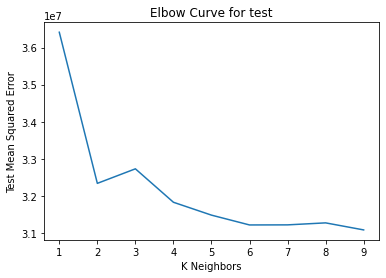

In [ ]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

The best k value for the knn was observed as 9

In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)
# Fitting the model
reg.fit(train_x, train_y)

# Predicting using the Train Set and calculating MSE
train_predict = reg.predict(train_x)
ktrain = mse(train_predict, train_y)
print('Train MSE    ', ktrain )

Train MSE     10519814.6339617


In [ ]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)
# Fitting the model
reg.fit(train_x, train_y)

# Predicting using the Test Set and calculating MSE
test_predict = reg.predict(test_x)
ktest = mse(test_predict, test_y)
print('Test MSE    ', ktest )

Test MSE     31086855.4391946


#Linear Regression

In [ ]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [ ]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [ ]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Training Mean  Error', k )

Training Mean  Error 9772792.198752813


In [ ]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Test Mean  Error    ', k )

Test Mean  Error     30085430.990275927


The test mse error seems to increase alot than the train mse error this seems like the model was overfitted

To overcome this we can find the coefficients of the function and find the most relevant ones

### Parameters of Linear Regression

In [ ]:
lr.coef_

array([ 1.56855968e+02, -2.05053462e+02,  1.53784464e+03, -7.78622015e+04,
        2.54884563e+02, -1.56330980e+03,  9.35731545e+04,  2.67870877e+02,
       -6.72338581e+15, -6.72338581e+15])

### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

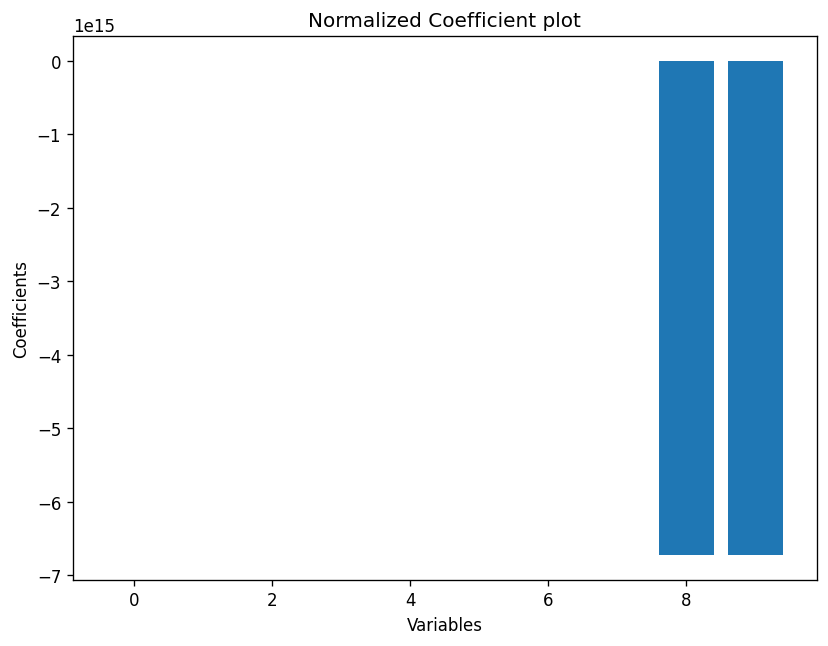

In [ ]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

#### Creating new subsets of data

In [ ]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

#### Arranging coefficients with features

In [ ]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients

,Variable,coefficient
0,passenger_count,1.568560e+02
1,pickuphour,-2.050535e+02
2,pickupday,1.537845e+03
3,pickupmonth,-7.786220e+04
4,dropoffhour,2.548846e+02
5,dropoffday,-1.563310e+03
6,dropoffmonth,9.357315e+04
7,store_and_fwd_encoded,2.678709e+02
8,vendor_id_1,-6.723386e+15
9,vendor_id_2,-6.723386e+15


In [ ]:
#Chossing variables with sigificance greater than 0 ( Filtering Significant Features)
sig_var = Coefficients[Coefficients.coefficient > 0]

In [ ]:
#Extracting the significant subset do independent Variables
subset = data[sig_var['Variable'].values]
subset.head()

,passenger_count,pickupday,dropoffhour,dropoffmonth,store_and_fwd_encoded
184765,1,2,23,3,0
697925,6,2,17,2,0
73547,1,4,0,1,0
281498,6,1,18,5,0
374196,1,6,1,6,0


In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

## Implementing Final Linear Regression

In [ ]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

#### Training Model

In [ ]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

#### Predicting over the train set

In [ ]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
lintrain = mse(train_predict, train_y)
print('Training Mean  Error', lintrain )

Training Mean  Error 9866148.79355098


#### Predicting over the test set

In [ ]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
lintest = mse(test_predict, test_y)
print('Test Mean  Error    ', lintest )

Test Mean  Error     30125192.291684538


There still seems to be a big difference between the train and the test models

#### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

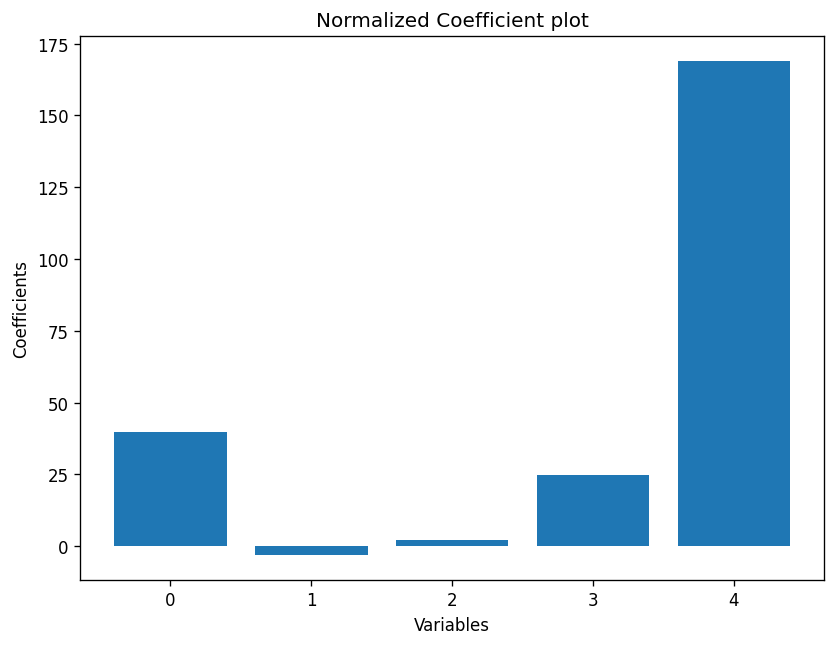

In [ ]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Here the variable 4 (store_and_frd_flag) has a higher significance

passenger_count and dropoff_month also has a decent significance to the linear model

### Implementing Ridge Regression model

Lets try to regularize our linear model by using the ridge and lasso models

In [ ]:
ridgem = Ridge(alpha = 2)

ridgem.fit(train_x, train_y)

ridgetrainpredict=ridgem.predict(train_x)

# Evaluating the Ridge Regression model using mse
rtrain = mse(train_y, ridgetrainpredict)
print(rtrain)

9866148.793620868


In [ ]:
ridgem = Ridge(alpha = 2)

ridgem.fit(train_x, train_y)

ridgetestpredict=ridgem.predict(test_x)

# Evaluating the Ridge Regression model
rtest = mse(test_y, ridgetestpredict)
print(rtest)

30125192.229189225


### Implementing Lasso Regression

In [ ]:
lassom = Lasso(alpha = 2)

lassom.fit(train_x, train_y)

lassotrainpredict=lassom.predict(train_x)

# Evaluating the Lasso Regression model
ltrain=mse(train_y, lassotrainpredict)
print(ltrain)

9866309.84762962


In [ ]:
lassom = Lasso(alpha = 2)

lassom.fit(train_x, train_y)

lassotestpredict=lassom.predict(test_x)

# Evaluating the Lasso Regression model
ltest=mse(test_y, lassotestpredict)
print(ltest)

30125242.321786396


the ridge and lasso regression seem to show the same case as above

# Decision Tree Regression

In [ ]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [ ]:
#importing the DecisionTreeRegressor to predict a decision tree 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=10)
regressor.fit(train_x, train_y)

DecisionTreeRegressor(random_state=10)

In [ ]:
#predicting using the test data
y_pred = regressor.predict(test_x)

In [ ]:
#Framing a dataframe using the predicted values and the actual values
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
443339,562,904.884532
439323,2203,862.500000
377143,773,670.667391
473235,309,875.490231
701005,131,835.690423
...,...,...
141356,575,892.375000
236872,710,946.843537
1153,887,980.493878
553810,377,1143.382567


In [ ]:
#Calculating the r2_score on train set
dtreetrain=regressor.score(train_x, train_y)
dtreetrain

0.022377869823920538

In [ ]:
#Calculating the r2_score on test set
dtreetest=regressor.score(test_x, test_y)
dtreetest

-0.0020601937832080974

In [ ]:
#Adding the r2_scores of the models to a list
dtlist = ['TRAIN','TEST']
dtelist=[dtreetrain,dtreetest]

Text(0.5, 1.0, 'DECISION ERROR plot')

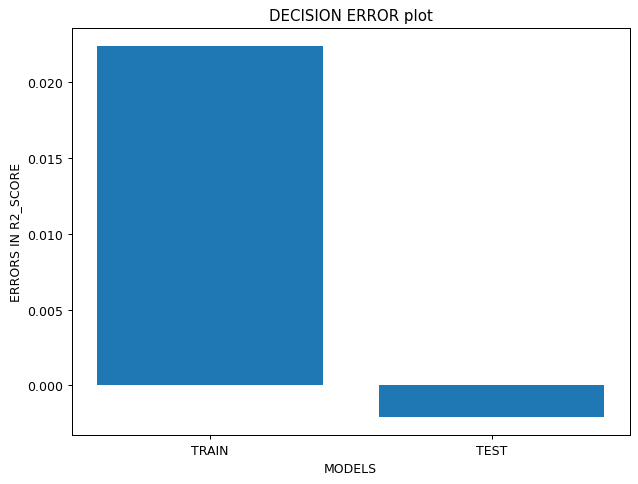

In [ ]:
#Plotting the r2_score of the decision trees
plt.figure(figsize=(8, 6), dpi=90, facecolor='w', edgecolor='b')
plt.bar( dtlist, dtelist )
plt.xlabel( "MODELS")
plt.ylabel('ERRORS IN R2_SCORE')
plt.title('DECISION ERROR plot')

###Visualizing the decision tree

In [ ]:
#importing the tree module 
from sklearn import tree

In [ ]:
#creating a decision tree using the decision tree instance 
decision_tree = tree.export_graphviz(regressor,out_file='nyctree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

In [ ]:
#converting the dot file to a png file for visualization
!dot -Tpng nyctree.dot -o nyctree.png

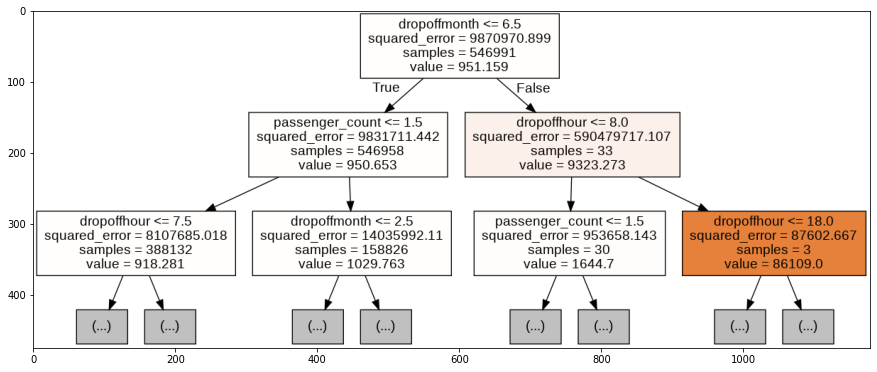

In [ ]:
#plotting the Decision Tree
image = plt.imread('nyctree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

*   The variable dropoffmonth is the feature used to split the tree do its importance is the most

*   The tree is then split using passenger_count and dropoffhour features signifing that they are the next features with are close to the purity of the node

# Visualizing the errors using barplots

In [ ]:
#creating a list to contain all the errors 
mlist = ['KNN','LINEAR','RIDGE','LASSO']
trlist=[ktrain,lintrain,rtrain,ltrain]
telist=[ktest,lintest,rtest,ltest]

Text(0.5, 1.0, 'TRAIN ERROR plot')

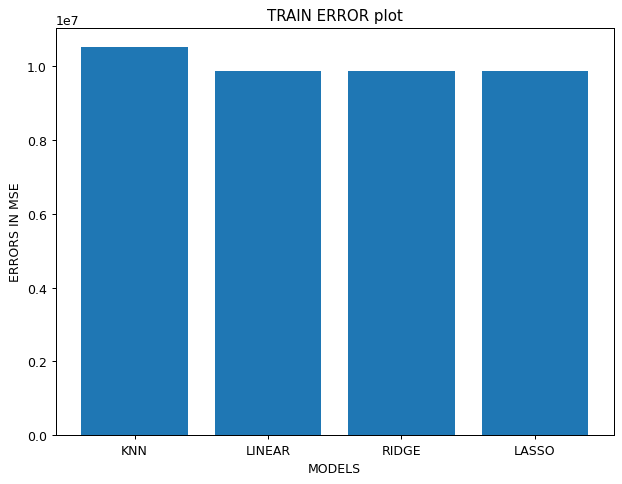

In [ ]:
#PLOTTING THE TRAIN ERROR PLOT
plt.figure(figsize=(8, 6), dpi=90, facecolor='w', edgecolor='b')
plt.bar( mlist, trlist )
plt.xlabel( "MODELS")
plt.ylabel('ERRORS IN MSE')
plt.title('TRAIN ERROR plot')

Text(0.5, 1.0, 'TEST ERROR plot')

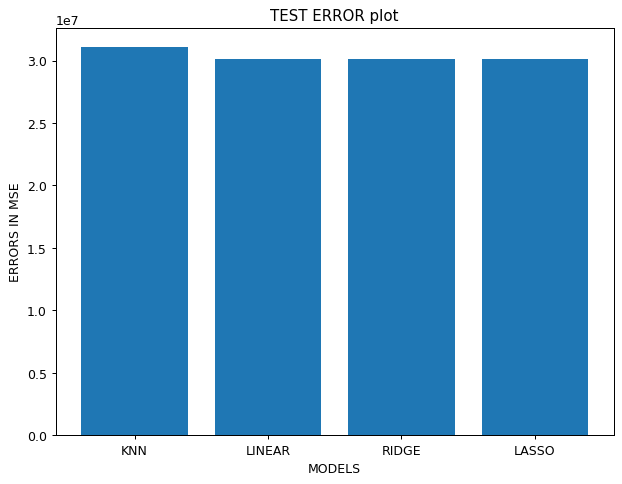

In [ ]:
#PLOTTING THE TEST ERROR PLOT
plt.figure(figsize=(8, 6), dpi=90, facecolor='w', edgecolor='b')
plt.bar( mlist, telist )
plt.xlabel( "MODELS")
plt.ylabel('ERRORS IN MSE')
plt.title('TEST ERROR plot')

- Observing the above plots we can see that the linear models performed well but showed a bit of overfitting

- The given data was well cleaned but the mse score is still pretty high